In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt 
import keras
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


In [3]:
y_train = y_train.reshape(-1,)
y_train[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [4]:
classes = ["areoplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [5]:
def plot_img(X,y,index):
  plt.figure(figsize=(5,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

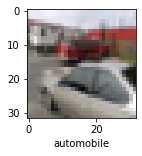

In [6]:
plot_img(x_train,y_train,49999)

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
NetA =  keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(10)
  ])

In [9]:
optimizer = tf.keras.optimizers.Adam()
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
NetA.compile(loss=loss,optimizer=optimizer,metrics=['accuracy'])

In [ ]:
historyneta=NetA.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

In [11]:
NetB = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation=tf.nn.relu),
    keras.layers.Dense(10)
  ])

In [12]:
NetB.compile(loss=loss,optimizer=optimizer,metrics=['accuracy'])

In [13]:
historynetb=NetB.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

In [14]:
NetC = keras.Sequential([
    keras.layers.Conv2D(25,(5,5),activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10)
  ])


In [15]:
NetC.compile(loss=loss,optimizer=optimizer,metrics=['accuracy'])

In [16]:
historynetc=NetC.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 8s 3ms/step - loss: 2.2998 - accuracy: 0.1125 - val_loss: 1.8745 - val_accuracy: 0.3406
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7955 - accuracy: 0.3645 - val_loss: 1.6944 - val_accuracy: 0.4034
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6326 - accuracy: 0.4229 - val_loss: 1.4602 - val_accuracy: 0.4870
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4394 - accuracy: 0.4961 - val_loss: 1.4378 - val_accuracy: 0.4886
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4009 - accuracy: 0.5096 - val_loss: 1.4085 - val_accuracy: 0.5049
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3724 - accuracy: 0.5203 - val_loss: 1.4329 - val_accuracy: 0.4981
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3661 - accuracy: 0.5235 - val_loss: 1.4025 - val_accuracy:

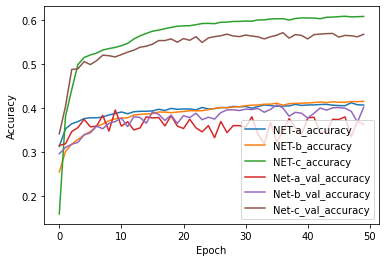

In [18]:
plt.plot(historyneta.history['accuracy'], label='NET-a_accuracy')
plt.plot(historynetb.history['accuracy'], label='NET-b_accuracy')
plt.plot(historynetc.history['accuracy'], label='NET-c_accuracy')
plt.plot(historyneta.history['val_accuracy'], label = 'Net-a_val_accuracy')
plt.plot(historynetb.history['val_accuracy'], label = 'Net-b_val_accuracy')
plt.plot(historynetc.history['val_accuracy'], label = 'Net-c_val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


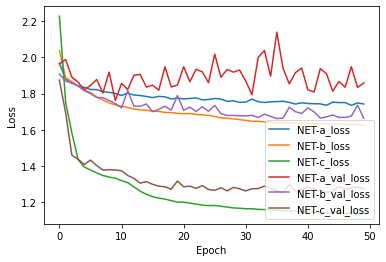

In [19]:
plt.plot(historyneta.history['loss'], label='NET-a_loss')
plt.plot(historynetb.history['loss'], label='NET-b_loss')
plt.plot(historynetc.history['loss'], label='NET-c_loss')
plt.plot(historyneta.history['val_loss'], label = 'NET-a_val_loss')
plt.plot(historynetb.history['val_loss'], label = 'NET-b_val_loss')
plt.plot(historynetc.history['val_loss'], label = 'NET-c_val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')


In [21]:
test_lossa, test_acca = NetA.evaluate(x_test,  y_test, verbose=0)
test_lossb, test_accb = NetB.evaluate(x_test,  y_test, verbose=0)
test_lossc, test_accc = NetC.evaluate(x_test,  y_test, verbose=0)

print(f'ACCURACY of NET-A is{test_acca} With a loss of {test_lossa}')
print(f'ACCURACY of NET-B is{test_accb} With a loss of {test_lossb}')
print(f'ACCURACY of NET-C is{test_accc} With a loss of {test_lossc}')




ACCURACY of NET-A is0.36230000853538513 With a loss of 1.8595144748687744
ACCURACY of NET-B is0.40130001306533813 With a loss of 1.6635525226593018
ACCURACY of NET-C is0.5669999718666077 With a loss of 1.2740668058395386
